In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
np.random.seed(997)
data = {
    "Product" : np.random.choice(["Product_A", "Product_B", "Product_C"], 1000),
    "Region" : np.random.choice(["North", "South", "East", "West"],1000),
    "Month" : np.random.randint(1,13, size=(1000)),
    "Sales" : np.random.randint(300, 50000, size=(1000))
}

df = pd.DataFrame(data)
df.head()

,Product,Region,Month,Sales
0,Product_B,North,7,1341
1,Product_C,East,2,22299
2,Product_A,South,5,18904
3,Product_C,West,1,24508
4,Product_A,South,1,19030


In [8]:
total_sales_of_product = df.groupby("Product")["Sales"].sum()
print(f"total sales per product:\n{total_sales_of_product}")

total sales per product:
Product
Product_A    9119909
Product_B    8193554
Product_C    8508243
Name: Sales, dtype: int32


In [19]:
avg_sales_per_product = round(df.groupby("Product")["Sales"].mean(),2)
print(f"Avg sales per product:\n{avg_sales_per_product}")

Avg sales per product:
Product
Product_A    26666.40
Product_B    26094.12
Product_C    24733.26
Name: Sales, dtype: float64


In [10]:
avg_sales_per_region = round(df.groupby("Region")["Sales"].mean(),2)
print(f"Avg sales per region:\n{avg_sales_per_region}")

Avg sales per region:
Region
East     26244.72
North    25970.91
South    25573.08
West     25506.52
Name: Sales, dtype: float64


In [12]:
count_of_sales_per_region = df.groupby("Region")["Sales"].count()
print(f"Count of sales per region:\n{count_of_sales_per_region}")

Count of sales per region:
Region
East     237
North    265
South    258
West     240
Name: Sales, dtype: int64


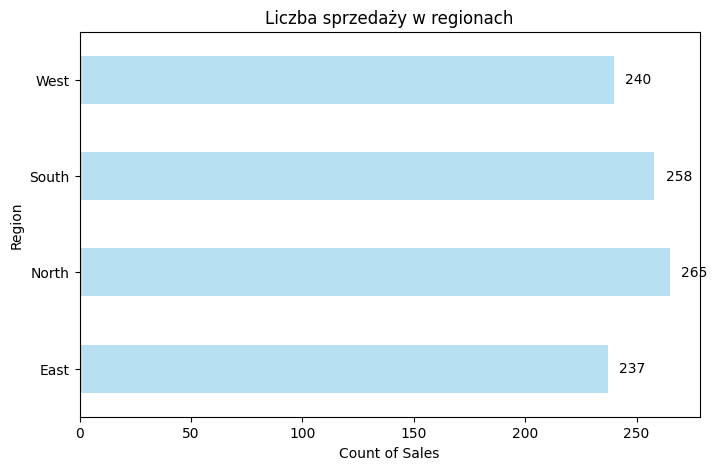

In [60]:
ax = count_of_sales_per_region.plot(kind='barh', alpha=0.6, color='skyblue', figsize=(8, 5))
for i, value in enumerate(count_of_sales_per_region):
    ax.text(value + 5, i, str(value), va='center')
plt.xlabel("Count of Sales")
plt.title("Liczba sprzedaży w regionach")
plt.show()


In [34]:
max_sales_per_region = df.groupby("Region")["Sales"].sum()
max_sales_in_region = max_sales_per_region.max()
region_with_max_sales = max_sales_per_region.idxmax()
print(f"Region with max sales:\t{region_with_max_sales}\nIt's value:\t{max_sales_in_region}")
min_sales_in_region = max_sales_per_region.min()
region_with_min_sales = max_sales_per_region.idxmin()
print(f"Region with max sales:\t{region_with_min_sales}\nIt's value:\t{min_sales_in_region}")


Region with max sales:	North
It's value:	6882290
Region with max sales:	West
It's value:	6121564


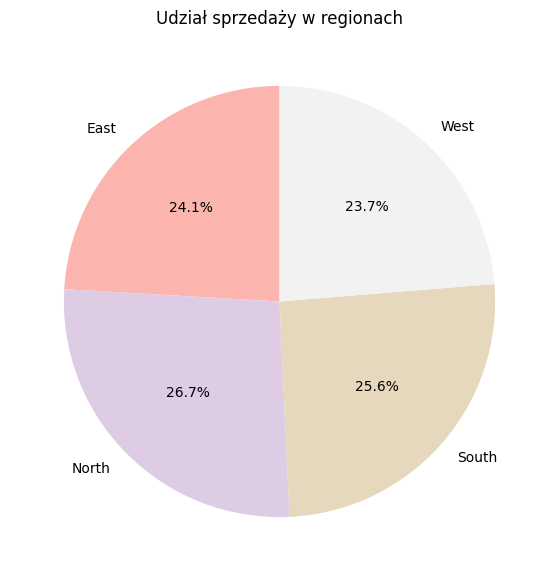

In [63]:
max_sales_per_region.plot(kind='pie', autopct="%1.1f%%", figsize=(7, 7), startangle=90, colormap='Pastel1')
plt.title("Udział sprzedaży w regionach")
plt.ylabel("")
plt.show()


In [66]:
pivot = df.pivot_table(columns="Region", values="Sales", index="Product", margins=True, aggfunc="sum")
total_sales = df["Sales"].sum()
pivot["Pct_of_All_Sales"] = round(total_sales_of_product  / total_sales * 100,2)
print(pivot)


Region        East    North    South     West       All  Pct_of_All_Sales
Product                                                                  
Product_A  2463427  2314715  2043915  2297852   9119909             35.32
Product_B  1741861  2136025  2302422  2013246   8193554             31.73
Product_C  2014710  2431550  2251517  1810466   8508243             32.95
All        6219998  6882290  6597854  6121564  25821706               NaN


In [64]:
pivot_sorted = pivot.sort_values(by="All", ascending=False)
print(pivot_sorted)


Region        East    North    South     West       All  Pct_of_All_Sales
Product                                                                  
All        6219998  6882290  6597854  6121564  25821706               NaN
Product_A  2463427  2314715  2043915  2297852   9119909             35.32
Product_C  2014710  2431550  2251517  1810466   8508243             32.95
Product_B  1741861  2136025  2302422  2013246   8193554             31.73
